In [74]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/transakcje.csv')

In [75]:
#import modules
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493531 entries, 0 to 493530
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  493531 non-null  int64  
 1   order_id                 493531 non-null  int64  
 2   product_id               493531 non-null  int64  
 3   group_id                 493531 non-null  int64  
 4   category_character_id    491344 non-null  float64
 5   category_gender_id       493517 non-null  float64
 6   category_sport_id        460416 non-null  float64
 7   brand_id                 493531 non-null  int64  
 8   color_id                 493531 non-null  int64  
 9   season_id                493531 non-null  int64  
 10  place_date               493531 non-null  object 
 11  promotion_variant_id     190941 non-null  float64
 12  quantity                 493531 non-null  int64  
 13  price                    493531 non-null  float64
 14  cata

# **MODEL RFM (Recency, Frequency, Monetary)**



1. **Recency** (Ostatniość): Mierzy to, jak niedawno klient dokonał zakupu. Im bardziej niedawno, tym lepiej, ponieważ świeży zakup może oznaczać aktywnego klienta.

2. **Frequency** (Częstotliwość): Określa, jak często klient dokonuje zakupów. Klienci dokonujący częstych zakupów są często bardziej wartościowi dla firmy niż ci, którzy zakupy wykonują sporadycznie.

3. **Monetary Value** (Wartość Monetarna): Ocenia wartość zakupów, jakie dokonał klient. Klienci, którzy wydają więcej, są zazwyczaj bardziej wartościowi dla firmy.

In [77]:
# Dane o konsumentach
rfmdata= data[pd.notnull(data['user_id'])]

# usunięcie zduplikowanych użytkowników
filtered_data=rfmdata[['user_id']].drop_duplicates()


In [78]:
# Wyodrębnij kolumny RFM
rfm = rfmdata[["user_id", "place_date", "quantity", "price"]]


rfm

,user_id,place_date,quantity,price
0,389080554,2017-01-21 15:49:45,1,151.46
1,389080341,2017-01-21 15:47:44,1,27.53
2,389080341,2017-01-21 15:47:44,1,15.29
3,389079871,2017-01-21 15:47:10,1,168.29
4,350488137,2017-01-21 15:42:13,1,38.24
...,...,...,...,...
493526,333220291,2015-02-03 21:04:55,1,18.16
493527,333219759,2015-02-03 20:02:25,1,153.00
493528,317905375,2015-01-29 12:09:22,1,214.19
493529,333219824,2015-02-03 20:03:46,1,130.05


In [79]:
# Monetary value

rfmdata['TotalPrice'] = data['quantity'] * data['price']


In [80]:
# Recency

# zmiana formatu kolumny place_date na datę oraz wyodrębnienie samej daty
rfmdata['place_date'] = pd.to_datetime(df['place_date'], errors='coerce')

rfmdata['date_only'] = rfmdata['place_date'].dt.date
print(data.dtypes)


user_id                      int64
order_id                     int64
product_id                   int64
group_id                     int64
category_character_id      float64
category_gender_id         float64
category_sport_id          float64
brand_id                     int64
color_id                     int64
season_id                    int64
place_date                  object
promotion_variant_id       float64
quantity                     int64
price                      float64
catalog_price              float64
club_card                    int64
kobieta                      int64
liczba_ludnosci_tysiace      int64
dtype: object


In [81]:
rfmdata.columns

Index(['user_id', 'order_id', 'product_id', 'group_id',
       'category_character_id', 'category_gender_id', 'category_sport_id',
       'brand_id', 'color_id', 'season_id', 'place_date',
       'promotion_variant_id', 'quantity', 'price', 'catalog_price',
       'club_card', 'kobieta', 'liczba_ludnosci_tysiace', 'TotalPrice',
       'date_only'],
      dtype='object')

In [82]:
# określenie przedziału czasowego w jakim zakupy były dokonywane

data['place_date'].min(),data['place_date'].max()


('2015-01-01 00:20:23', '2017-04-05 14:38:37')

In [107]:
data['place_date'] = pd.to_datetime(data['place_date'])


In [108]:
rfmdata.head()

,user_id,order_id,product_id,group_id,category_character_id,category_gender_id,category_sport_id,brand_id,color_id,season_id,place_date,promotion_variant_id,quantity,price,catalog_price,club_card,kobieta,liczba_ludnosci_tysiace,TotalPrice,date_only
0,389080554,386016687,356149836,230249315,169.0,112.0,1459.0,87,110691387,355053503,2017-01-21 15:49:45,388866163.0,1,151.46,168.29,0,1,300,151.46,2017-01-21
1,389080341,389078038,335087789,230750660,169.0,112.0,497.0,87,110691387,335005459,2017-01-21 15:47:44,388866163.0,1,27.53,30.59,0,1,0,27.53,2017-01-21
2,389080341,389078038,366883454,424,169.0,115.0,497.0,14773891,110691444,355053503,2017-01-21 15:47:44,NaN,1,15.29,15.29,0,1,0,15.29,2017-01-21
3,389079871,388746311,355633656,230249315,169.0,115.0,1459.0,49,110691397,355053503,2017-01-21 15:47:10,NaN,1,168.29,168.29,0,1,0,168.29,2017-01-21
4,350488137,389077490,324767213,418,169.0,113.0,497.0,14773891,110691387,355053503,2017-01-21 15:42:13,NaN,1,38.24,38.24,0,1,0,38.24,2017-01-21


In [109]:
# Przygotowanie dataframe o nazwie rfm, zawierającego kolumny niezbędne do stworzenia modelu

rfm= rfmdata.groupby('user_id').agg({'place_date': lambda date: (PRESENT - date.max()).days,
                                        'order_id': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})


In [110]:
rfm.columns


Index(['place_date', 'order_id', 'TotalPrice'], dtype='object')

In [111]:
# Zmiana nazw kolumn na odpowiednio - "recency", "frequency" i "monetary"
rfm.columns=['recency', 'frequency', 'monetary']

In [112]:
rfm['recency'] = rfm['recency'].astype(int)


In [113]:
rfm


,recency,frequency,monetary
user_id,,,
227367,-1324,3,160.63
233187,-1390,1,252.44
233330,-1711,3,401.29
233499,-1571,1,97.53
233620,-1716,1,68.84
...,...,...,...
396634672,-1944,1,191.24
396635268,-1944,1,382.49
396635314,-1944,1,229.49


In [114]:
# Podzielenie danych na kwartyle oraz przydzielenie poszczególnych obserwacji do narzuconych przedziałów

rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, labels=False, duplicates='drop') + 1
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, labels=False, duplicates='drop') + 1
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, labels=False, duplicates='drop') + 1

# Wyświetl wynik
print(rfm)

           recency  frequency  monetary  r_quartile  f_quartile  m_quartile
user_id                                                                    
227367       -1324          3    160.63           4           2           2
233187       -1390          1    252.44           4           1           3
233330       -1711          3    401.29           2           2           4
233499       -1571          1     97.53           3           1           1
233620       -1716          1     68.84           2           1           1
...            ...        ...       ...         ...         ...         ...
396634672    -1944          1    191.24           1           1           2
396635268    -1944          1    382.49           1           1           4
396635314    -1944          1    229.49           1           1           3
396635704    -1944          1    284.57           1           1           4
396636538    -1944          2    107.08           1           1           1

[273815 row

In [117]:
# Dodanie kolumny ze wskaźnikiem RFM_Score, który łączy kwartyle r, f oraz m w jedną liczbę

rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
user_id,,,,,,,
227367,-1324,3,160.63,4,2,2,422
233187,-1390,1,252.44,4,1,3,413
233330,-1711,3,401.29,2,2,4,224
233499,-1571,1,97.53,3,1,1,311
233620,-1716,1,68.84,2,1,1,211


In [119]:
# Filtrowanie user_id o największym wskaźniku RFM, czyli o wartości 111

rfm[rfm['RFM_Score']=='111']

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
user_id,,,,,,,
240284,-1853,1,117.04,1,1,1,111
270685,-1844,1,78.02,1,1,1,111
959688,-1864,1,101.74,1,1,1,111
1723329,-1834,1,85.37,1,1,1,111
4413799,-1887,1,99.44,1,1,1,111
...,...,...,...,...,...,...,...
396632474,-1944,2,21.39,1,1,1,111
396632740,-1944,1,68.84,1,1,1,111
396633623,-1944,1,30.58,1,1,1,111


In [120]:
# Filtrowanie user_id o największym wskaźniku RFM, czyli o wartości 111

rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
user_id,,,,,,,
392481833,-1907,2,122.38,1,1,1,111
393153217,-1913,1,122.38,1,1,1,111
394812504,-1929,2,122.38,1,1,1,111
385937224,-1842,2,122.38,1,1,1,111
392385259,-1906,2,122.38,1,1,1,111


<Axes: >

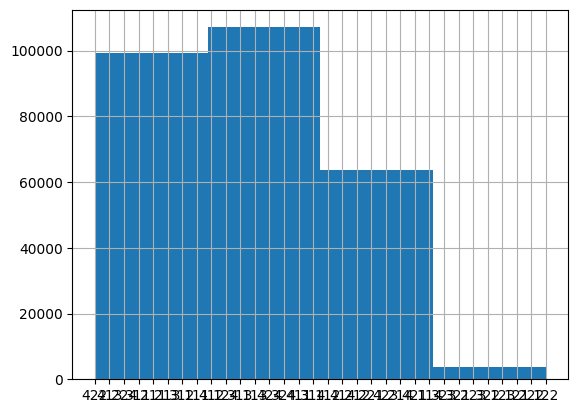

In [123]:
# Wizualizacja danych

import matplotlib.pyplot as plt

rfm['RFM_Score'].hist(bins=4)

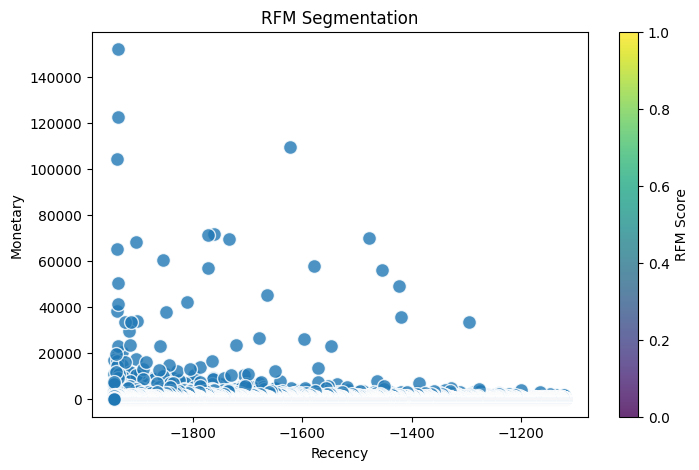

In [131]:
# Wykres zależności retencji od wartości monetarnej
plt.figure(figsize=(8, 5))
plt.scatter(rfm['recency'], rfm['monetary'], s=100, alpha=0.8, edgecolors='w', linewidth=1)

# Dodaj etykiety i tytuł
plt.title('RFM Segmentation')
plt.xlabel('Recency')
plt.ylabel('Monetary')

# Dodaj kolorową skalę RFM_Score
cbar = plt.colorbar()
cbar.set_label('RFM Score')

# Wyświetl wykres
plt.show()